In [1]:
import json, csv, os
import pandas as pd
import numpy as np

from sklearn import linear_model

import warnings
warnings.filterwarnings(action="ignore", module="sklearn", message="^internal gelsd")

def read_json(name):
    """ Read in the JSON file and return list of pairs timestamp and value.
    """

    JDATA = json.load(open(name))

    DATA = pd.DataFrame(list(JDATA.items()), columns=["ts", "value"])

    DATA['ts']  = pd.to_datetime(DATA['ts'], unit='s')

    return DATA

def read_csv(name):
    """ Read in the CSV file and return list of pairs timestamp and value.
    """

    DATA = pd.read_csv(open(name), names=["ts", "value"])

    DATA['ts'] = pd.to_datetime(DATA['ts'])

    return DATA

In [2]:
def linear_regression_sklearn(data):
    """ Fit linear regression model for the data.
    """
    dataset = data.values

    X_train = dataset[:,0].reshape(-1,1)
    y_train = dataset[:,1]

    regr = linear_model.LinearRegression()

    regr.fit(X_train, y_train)

    return (regr.coef_[0], regr.intercept_)

In [3]:
def linear_regression_manual(data):
    """ My incorrect way to fit the data to liner model manually.
    """
    X_0 = None
    Y_0 = None

    S_x = 0
    S_y = 0

    DELTA = []

    data.sort_values(by='ts')

    for i, (x,y) in data.iterrows():

        S_x += x
        S_y += y

        if X_0 is None:
            X_0 = x
            Y_0 = y
            continue

        dx = x - X_0
        dy = y - Y_0

        DELTA.append(dy/dx)

    a = np.array(DELTA).mean()

    X_avg = S_x / len(data)
    Y_avg = S_y / len(data)

    return (a, Y_avg - X_avg*a)

In [4]:
def linear_regression_manual2(data):
    """ Correct way to fit the data to liner model manually.
    """
    X = data['ts']
    Y = data['value']

    X_avg = X.mean()
    Y_avg = Y.mean()

    X_cntr = X - X_avg
    Y_cntr = Y - Y_avg

    a = (X_cntr*Y_cntr).sum() / (X_cntr*X_cntr).sum()
    b = Y_avg - a*X_avg

    return (a, b)

In [5]:
DIR = "data"
IN = []

for fn in os.listdir(DIR):
    fname = os.path.join(DIR, fn)

    p, e = os.path.splitext(fn)
    if e == ".csv":     d = read_csv(fname)
    elif e == ".json":  d = read_json(fname)

    # Convert time to seconds.
    d['ts'] = d['ts'].astype('int64') // 1e9

    IN.append(d)

In [6]:
# Combine list of arrays and average them grouping by timestamp.

DATA = pd.concat(IN).groupby(["ts"], as_index=False).mean()

In [7]:
RESULT = pd.DataFrame()

(a, b) = linear_regression_sklearn(DATA)
RESULT['sklearn'] = a * DATA['ts'] + b

(a, b) = linear_regression_manual(DATA)
RESULT['manual'] = a * DATA['ts'] + b

(a, b) = linear_regression_manual2(DATA)
RESULT['manual2'] = a * DATA['ts'] + b

print(pd.concat([DATA, RESULT], axis=1))

               ts       value     sklearn      manual     manual2
0    1.508026e+09    2.450580    2.824168    2.273825    2.824168
1    1.508026e+09    5.626199    5.955083    5.415747    5.955083
2    1.508027e+09    9.126113    9.085998    8.557669    9.085998
3    1.508028e+09   11.937737   12.216912   11.699590   12.216912
4    1.508029e+09   15.634973   15.347827   14.841512   15.347827
5    1.508030e+09   18.055576   18.478742   17.983433   18.478742
6    1.508031e+09   21.031994   21.609657   21.125355   21.609657
7    1.508032e+09   24.787419   24.740571   24.267276   24.740571
8    1.508033e+09   26.518011   27.871486   27.409198   27.871486
9    1.508034e+09   30.426633   31.002401   30.551120   31.002401
10   1.508035e+09   34.062037   34.133315   33.693041   34.133315
11   1.508036e+09   37.653705   37.264230   36.834963   37.264230
12   1.508036e+09   38.950279   40.395145   39.976884   40.395145
13   1.508037e+09   41.715899   43.526059   43.118806   43.526059
14   1.508

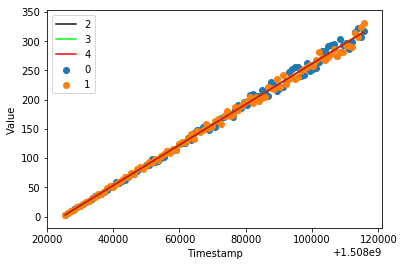

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(IN[0]['ts'], IN[0]['value'], label='0')
ax1.scatter(IN[1]['ts'], IN[1]['value'], label='1')

ax1.plot(DATA['ts'], RESULT['sklearn'], '#0F0F0F', label='2')
ax1.plot(DATA['ts'], RESULT['manual'], '#00FF0F', label='3')
ax1.plot(DATA['ts'], RESULT['manual2'], '#FF000F', label='4')

plt.xlabel("Timestamp")
plt.ylabel("Value")

plt.legend(loc='upper left');

plt.show()

In [14]:
print(DATA.info())
print(DATA.head())
print(DATA.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 2 columns):
ts       101 non-null float64
value    101 non-null float64
dtypes: float64(2)
memory usage: 2.4 KB
None
             ts      value
0  1.508026e+09   2.450580
1  1.508026e+09   5.626199
2  1.508027e+09   9.126113
3  1.508028e+09  11.937737
4  1.508029e+09  15.634973
                 ts       value
count  1.010000e+02  101.000000
mean   1.508071e+09  159.369904
std    2.637015e+04   91.822075
min    1.508026e+09    2.450580
25%    1.508048e+09   82.143233
50%    1.508071e+09  157.840237
75%    1.508093e+09  241.114404
max    1.508116e+09  323.756240


In [49]:
a = pd.DataFrame([1,2,3], columns=["x"])
b = a.copy()

b["ts"] = pd.to_datetime(b["x"] + 1490195805, unit='s')

print(b.describe(include = 'all'))

print(b.columns)

print(b.shape)

b.head()

          x                   ts
count   3.0                    3
unique  NaN                    3
top     NaN  2017-03-22 15:16:47
freq    NaN                    1
first   NaN  2017-03-22 15:16:46
last    NaN  2017-03-22 15:16:48
mean    2.0                  NaN
std     1.0                  NaN
min     1.0                  NaN
25%     1.5                  NaN
50%     2.0                  NaN
75%     2.5                  NaN
max     3.0                  NaN
Index(['x', 'ts'], dtype='object')
(3, 2)


,x,ts
0,1,2017-03-22 15:16:46
1,2,2017-03-22 15:16:47
2,3,2017-03-22 15:16:48


In [50]:
c = b.copy()

c["y"] = c["x"].astype('int64')

c.info()

c.describe(include=['datetime'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
x     3 non-null int64
ts    3 non-null datetime64[ns]
y     3 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 152.0 bytes


,ts
count,3
unique,3
top,2017-03-22 15:16:47
freq,1
first,2017-03-22 15:16:46
last,2017-03-22 15:16:48


In [59]:
c.sort_values(by=["x", "y"], ascending=True).head()

,x,ts,y
0,1,2017-03-22 15:16:46,1
1,2,2017-03-22 15:16:47,2
2,3,2017-03-22 15:16:48,3


In [65]:
print(c['x'].min(), c['x'].max(), c['x'].mean(), c['x'].std(), c['x'].median())

1 3 2.0 1.0 2.0


In [66]:
c['x']

0    1
1    2
2    3
Name: x, dtype: int64

In [69]:
c[c['x']==1]

,x,ts,y
0,1,2017-03-22 15:16:46,1


In [85]:
c.loc[0:2, 'x':'y']

,x,ts,y
0,1,2017-03-22 15:16:46,1
1,2,2017-03-22 15:16:47,2
2,3,2017-03-22 15:16:48,3


In [90]:
c['x'] = c['x'].apply(lambda x: x+1)

In [91]:
c

,x,ts,y
0,2,2017-03-22 15:16:46,1
1,3,2017-03-22 15:16:47,2
2,4,2017-03-22 15:16:48,3


In [94]:
c['x'].map(lambda x: x*10)

0    20
1    30
2    40
Name: x, dtype: int64

In [101]:
d = c.copy()
d['x'] = c['x'].map({2:20, 3:20, 4:44})

In [127]:
d.groupby('x')['y', 'ts'].agg([np.max, np.min])

y                       ts                    
   amax amin                amax                amin
x                                                   
20    2    1 2017-03-22 15:16:47 2017-03-22 15:16:46
44    3    3 2017-03-22 15:16:48 2017-03-22 15:16:48

In [112]:
d

,x,ts,y
0,20,2017-03-22 15:16:46,1
1,20,2017-03-22 15:16:47,2
2,44,2017-03-22 15:16:48,3


In [156]:
grouped = d.groupby('x', as_index=False)['y', 'ts'].agg({'y':np.max, 'ts':np.max})

grouped

,x,y,ts
0,20,2,2017-03-22 15:16:47
1,44,3,2017-03-22 15:16:48


In [159]:
pd.crosstab(d['x'], d['y'])

y,1,2,3
x,,,
20,1,1,0
44,0,0,1


In [160]:
pd.crosstab(d['x'], d['y'], normalize=True)

y,1,2,3
x,,,
20,0.333333,0.333333,0.000000
44,0.000000,0.000000,0.333333


In [162]:
z = d['x']+d['y']
d.insert(loc=len(d.columns), column='z', value=z)
d

,x,ts,y,z
0,20,2017-03-22 15:16:46,1,21
1,20,2017-03-22 15:16:47,2,22
2,44,2017-03-22 15:16:48,3,47


In [163]:
d.x

0    20
1    20
2    44
Name: x, dtype: int64

In [165]:
d['x']

0    20
1    20
2    44
Name: x, dtype: int64

In [169]:
d['x'].sort_values(ascending=False)

2    44
1    20
0    20
Name: x, dtype: int64

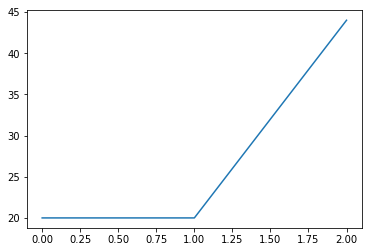

In [171]:
d.x.plot()